In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("heart.csv", encoding = 'utf8')
df

,age,sex,pain type,BP,cholestrol,fbs,resting ecg,max heart rate,exercise angina,ST depression,ST slope,flouroscopy coloured,thal,heart disease,Unnamed: 14
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2,NaN
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1,NaN
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2,NaN
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1,NaN
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1,NaN
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1,NaN
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1,NaN
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1,NaN


In [4]:
df.head()

,age,sex,pain type,BP,cholestrol,fbs,resting ecg,max heart rate,exercise angina,ST depression,ST slope,flouroscopy coloured,thal,heart disease,Unnamed: 14
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2,NaN
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1,NaN
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2,NaN
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1,NaN
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   270 non-null    int64  
 1   sex                   270 non-null    int64  
 2   pain type             270 non-null    int64  
 3   BP                    270 non-null    int64  
 4   cholestrol            270 non-null    int64  
 5   fbs                   270 non-null    int64  
 6   resting ecg           270 non-null    int64  
 7   max heart rate        270 non-null    int64  
 8   exercise angina       270 non-null    int64  
 9   ST depression         270 non-null    float64
 10  ST slope              270 non-null    int64  
 11  flouroscopy coloured  270 non-null    int64  
 12  thal                  270 non-null    int64  
 13  heart disease         270 non-null    int64  
 14  Unnamed: 14           0 non-null      float64
dtypes: float64(2), int64(13

In [6]:
columns_to_drop = ['Unnamed: 14']
df.drop(columns=columns_to_drop, inplace=True)

In [7]:
df.head()

,age,sex,pain type,BP,cholestrol,fbs,resting ecg,max heart rate,exercise angina,ST depression,ST slope,flouroscopy coloured,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
df.describe()

,age,sex,pain type,BP,cholestrol,fbs,resting ecg,max heart rate,exercise angina,ST depression,ST slope,flouroscopy coloured,thal,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [10]:
new_column_names = {
    'resting ecg' : 'resting_ecg ',
    'max heart rate': 'maxheartrate',
    'pain type' : 'paintype',
    'exercise angina': 'exercise_angina',
    'ST depression': 'ST_depression',
    'ST slope': 'ST_slope',
    'flouroscopy coloured': 'flouroscopy_coloured',
    'heart disease' : 'heart_disease'
}

# Rename columns using the defined dictionary
df.rename(columns=new_column_names, inplace=True)

<Axes: >

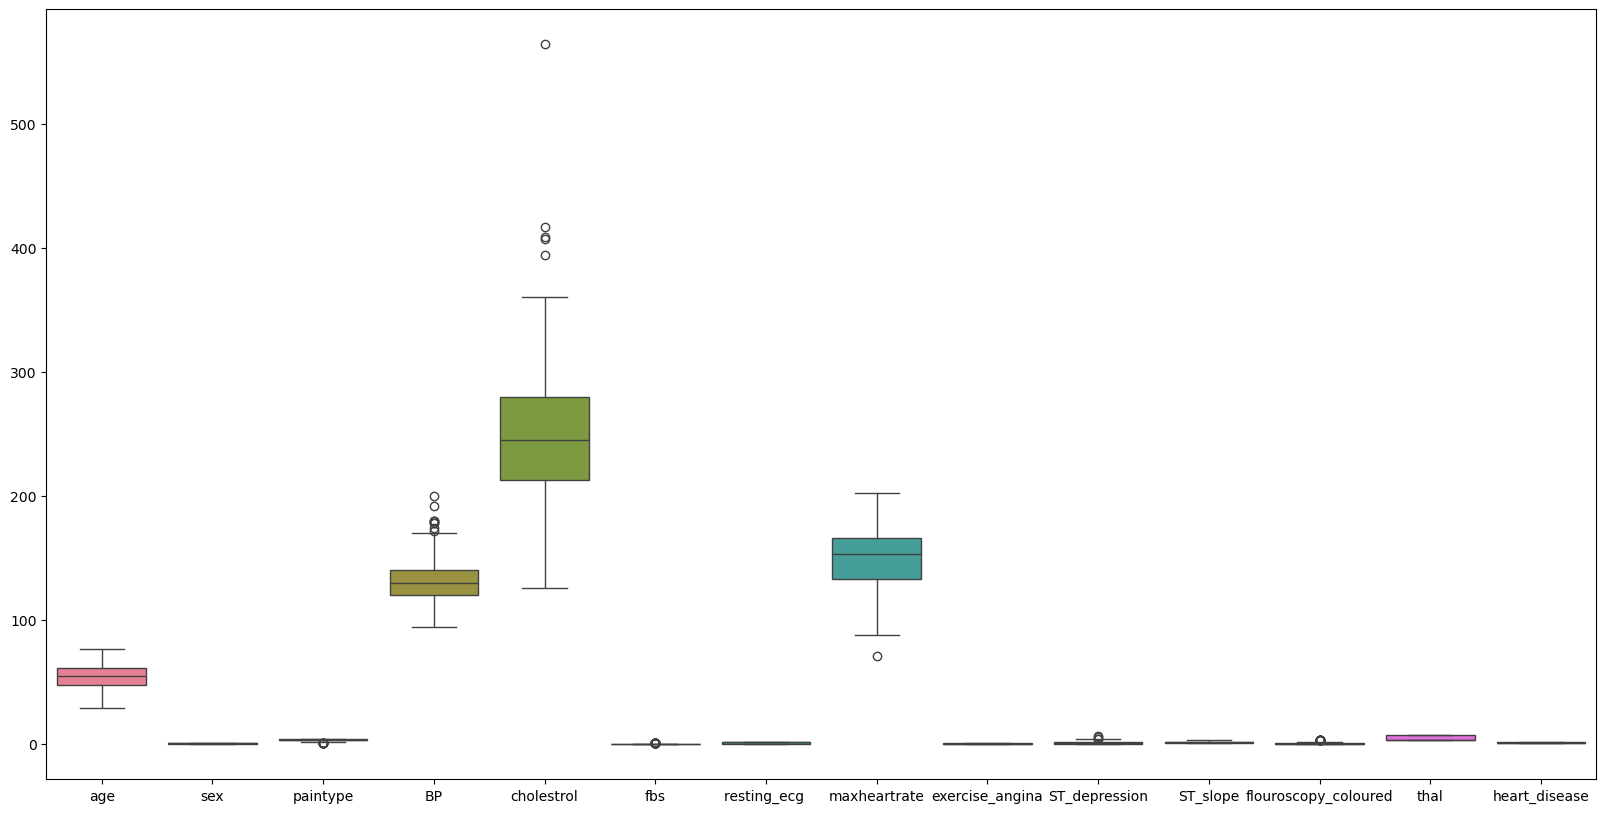

In [11]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)


<Axes: ylabel='cholestrol'>

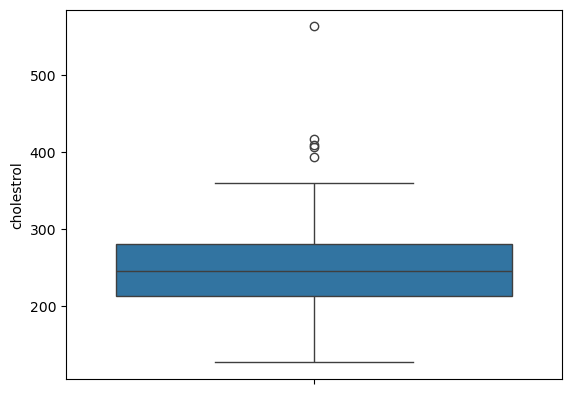

In [12]:
sns.boxplot(df['cholestrol'])

# Removing outliers

In [14]:
df_1 = df.copy()

In [15]:
Q1_cholestrol = df['cholestrol'].quantile(0.25)
Q3_cholestrol= df['cholestrol'].quantile(0.75)
IQR_cholestrol = Q3_cholestrol - Q1_cholestrol


Q1_BP = df['BP'].quantile(0.25)
Q3_BP= df['BP'].quantile(0.75)
IQR_BP = Q3_BP - Q1_BP


Q1_maxheartrate = df['maxheartrate'].quantile(0.25)
Q3_maxheartrate = df['maxheartrate'].quantile(0.75)
IQR_cmaxheartrate = Q3_maxheartrate - Q1_maxheartrate

In [16]:
lower_bound_cholestrol = Q1_cholestrol - 1.5 * IQR_cholestrol
upper_bound_cholestrol = Q3_cholestrol + 1.5 * IQR_cholestrol

lower_bound_BP = Q1_BP - 1.5 * IQR_BP
upper_bound_BP = Q3_BP + 1.5 * IQR_BP


lower_bound_maxheartrate = Q1_maxheartrate - 1.5 * IQR_cmaxheartrate
upper_bound_maxheartrate = Q3_maxheartrate + 1.5 * IQR_cmaxheartrate



In [17]:
df_1 = df_1[(df_1['cholestrol'] >= lower_bound_cholestrol) & (df_1['cholestrol'] <= upper_bound_cholestrol) ]
df_1 = df_1[(df_1['BP'] >= lower_bound_BP) & (df_1['BP'] <= upper_bound_BP) ]
df_1 = df_1[(df_1['maxheartrate'] >= lower_bound_maxheartrate) & (df_1['maxheartrate'] <= upper_bound_maxheartrate) ]

In [18]:
df_1.head()

,age,sex,paintype,BP,cholestrol,fbs,resting_ecg,maxheartrate,exercise_angina,ST_depression,ST_slope,flouroscopy_coloured,thal,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,1


In [19]:
df_1.describe()

,age,sex,paintype,BP,cholestrol,fbs,resting_ecg,maxheartrate,exercise_angina,ST_depression,ST_slope,flouroscopy_coloured,thal,heart_disease
count,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
mean,54.054902,0.698039,3.160784,129.529412,245.243137,0.137255,1.007843,149.803922,0.321569,1.012941,1.568627,0.666667,4.654902,1.435294
std,9.149509,0.460011,0.952427,15.466439,44.253072,0.344793,0.999969,22.973812,0.467997,1.112858,0.610115,0.940486,1.931536,0.496770
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000
25%,47.000000,0.000000,3.000000,120.000000,212.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000
50%,54.000000,1.000000,3.000000,130.000000,243.000000,0.000000,2.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,1.000000
75%,60.500000,1.000000,4.000000,140.000000,274.500000,0.000000,2.000000,168.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,2.000000


<Axes: ylabel='cholestrol'>

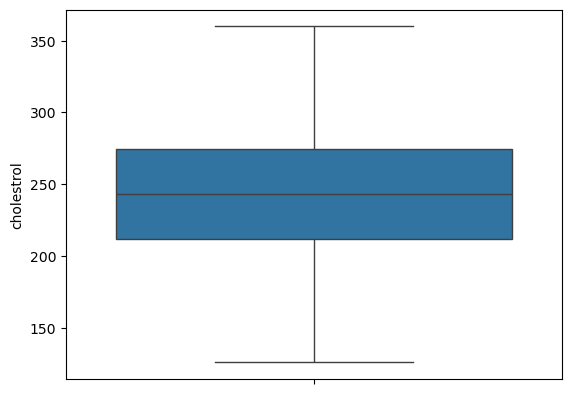

In [20]:
sns.boxplot(df_1['cholestrol'])

<Axes: ylabel='BP'>

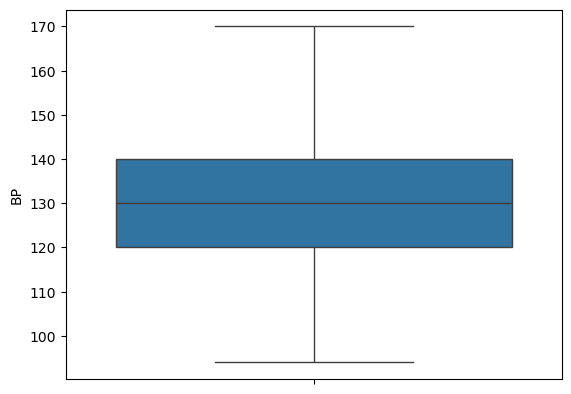

In [21]:
sns.boxplot(df_1['BP'])

<Axes: ylabel='maxheartrate'>

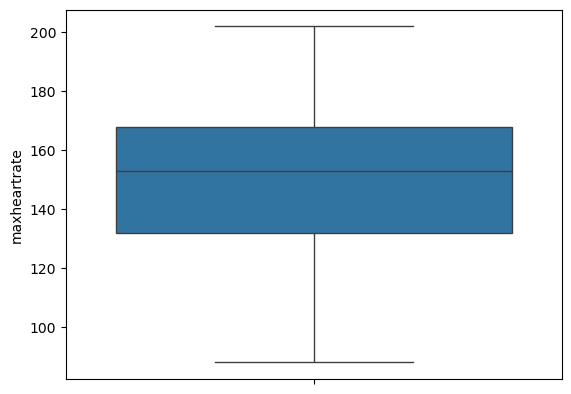

In [22]:
sns.boxplot(df_1['maxheartrate'])

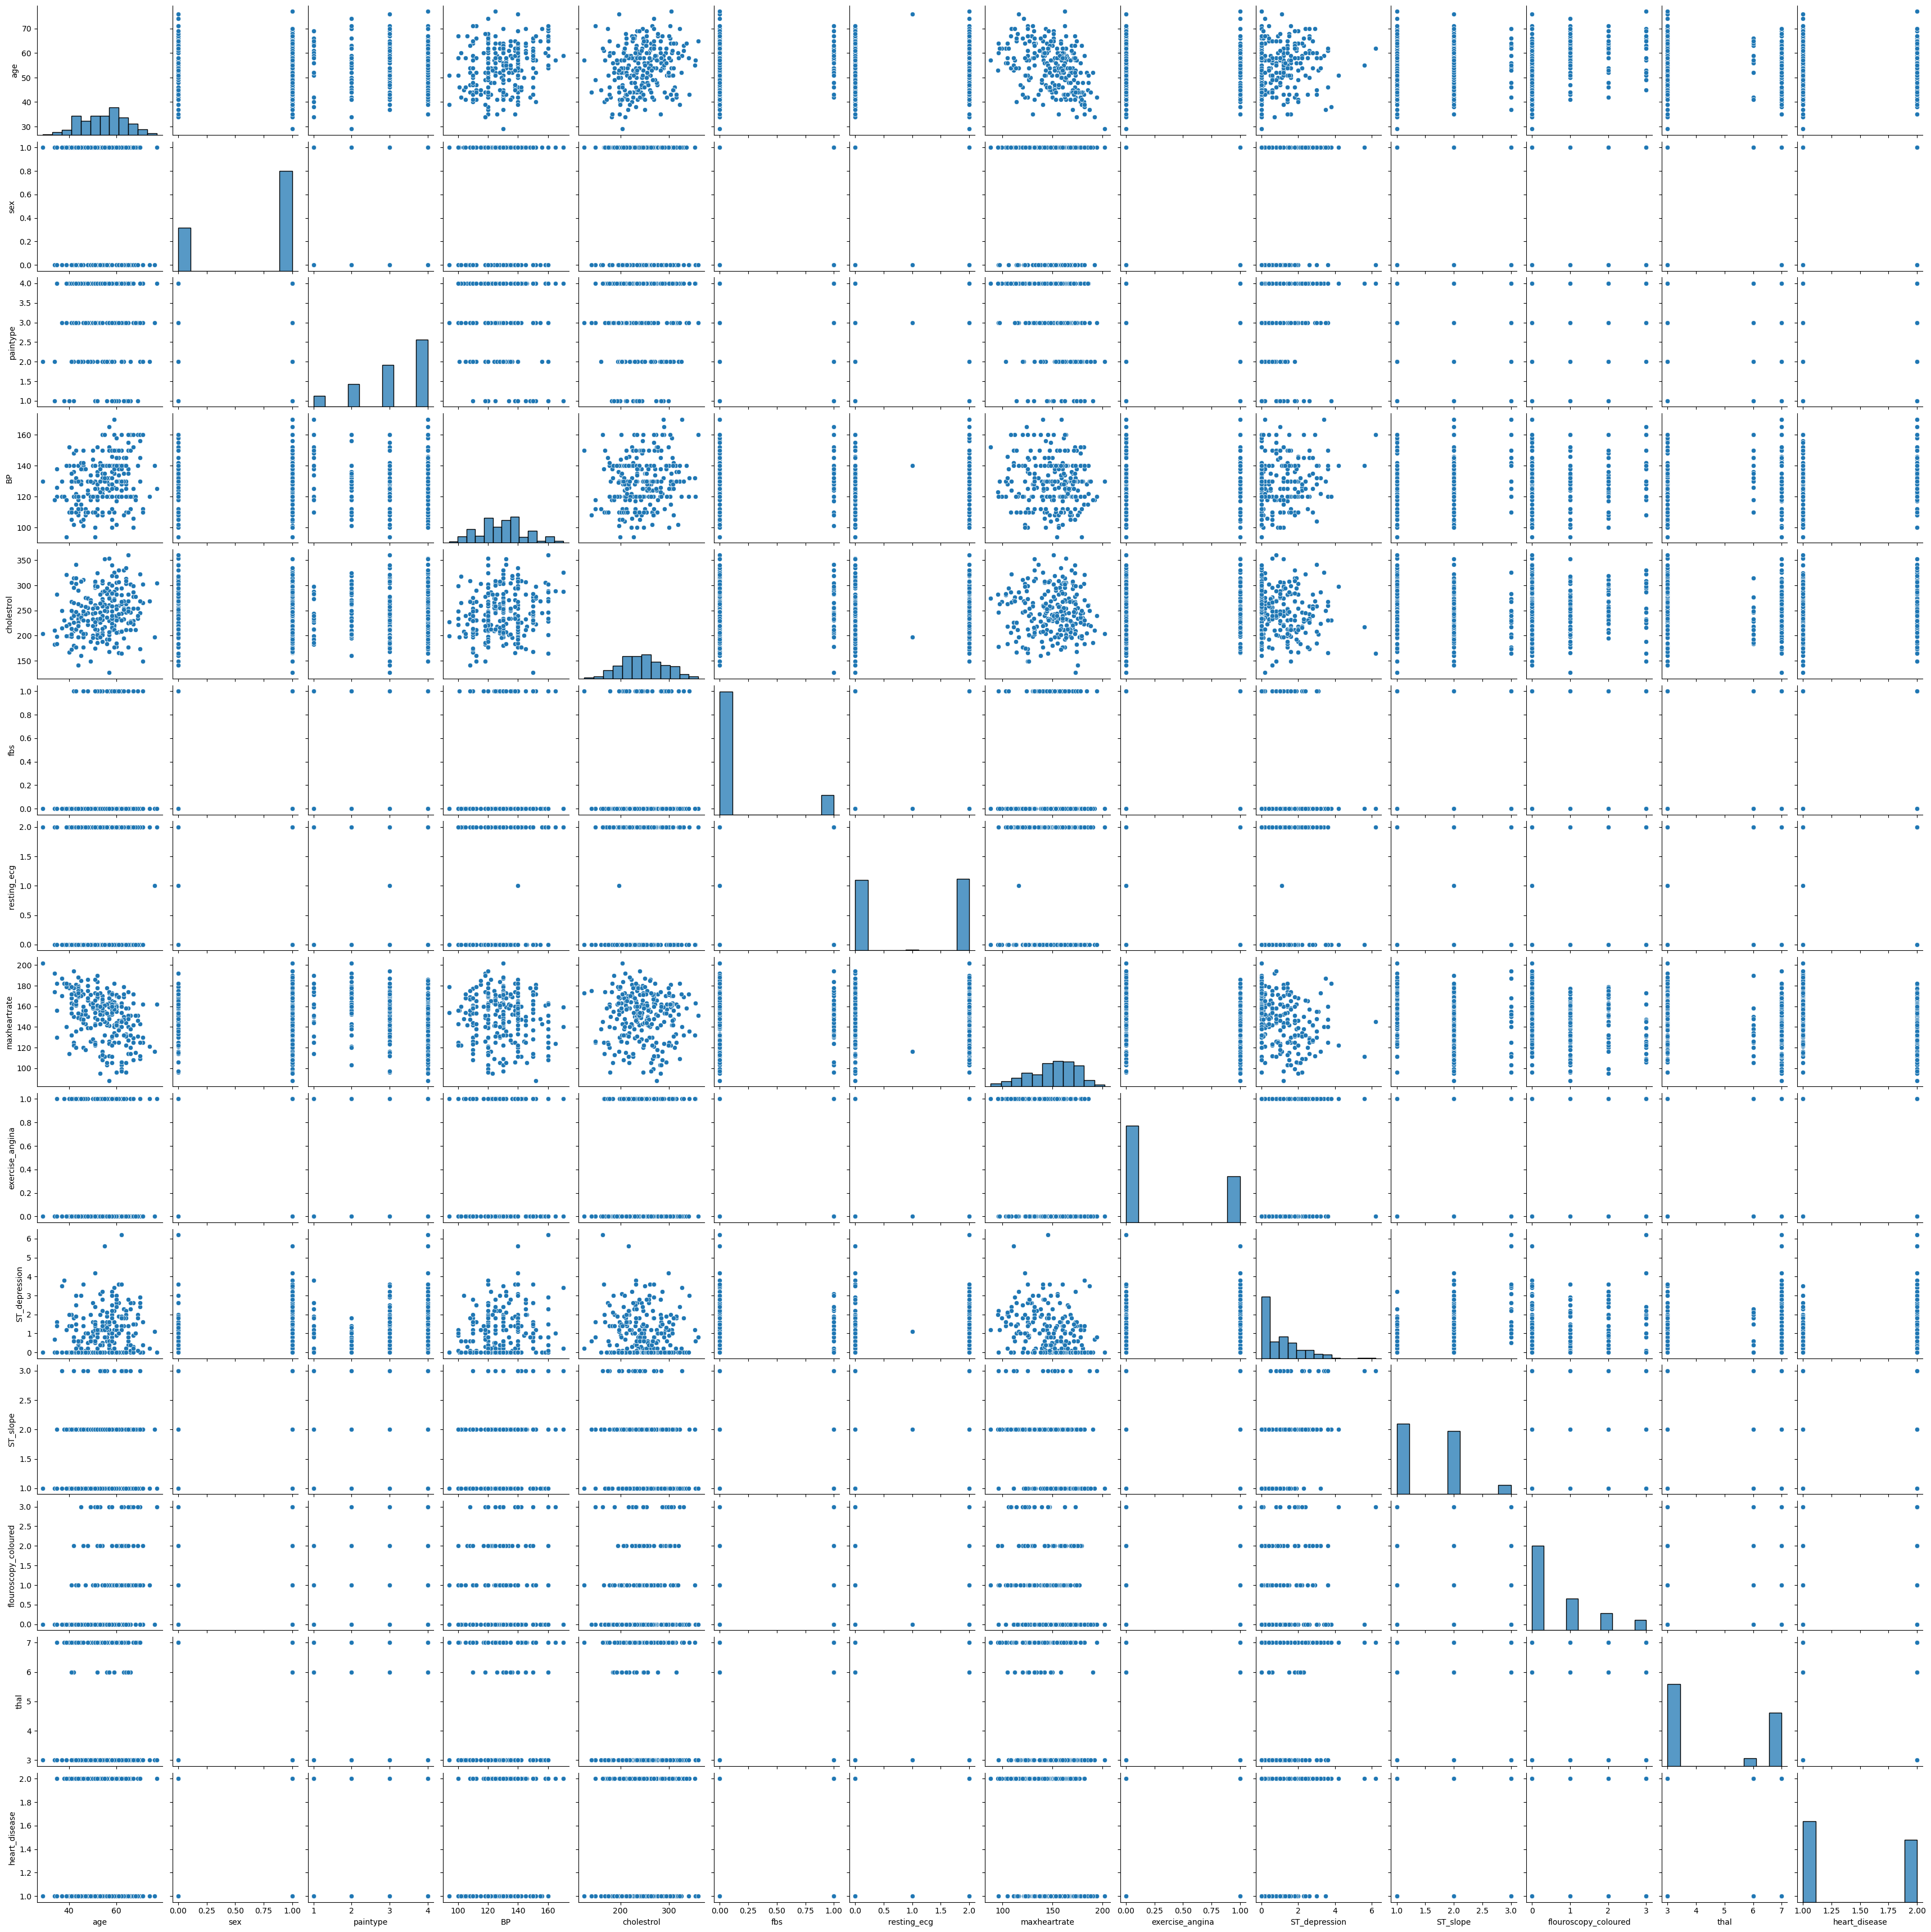

In [23]:
sns.pairplot(df_1)

<Axes: >

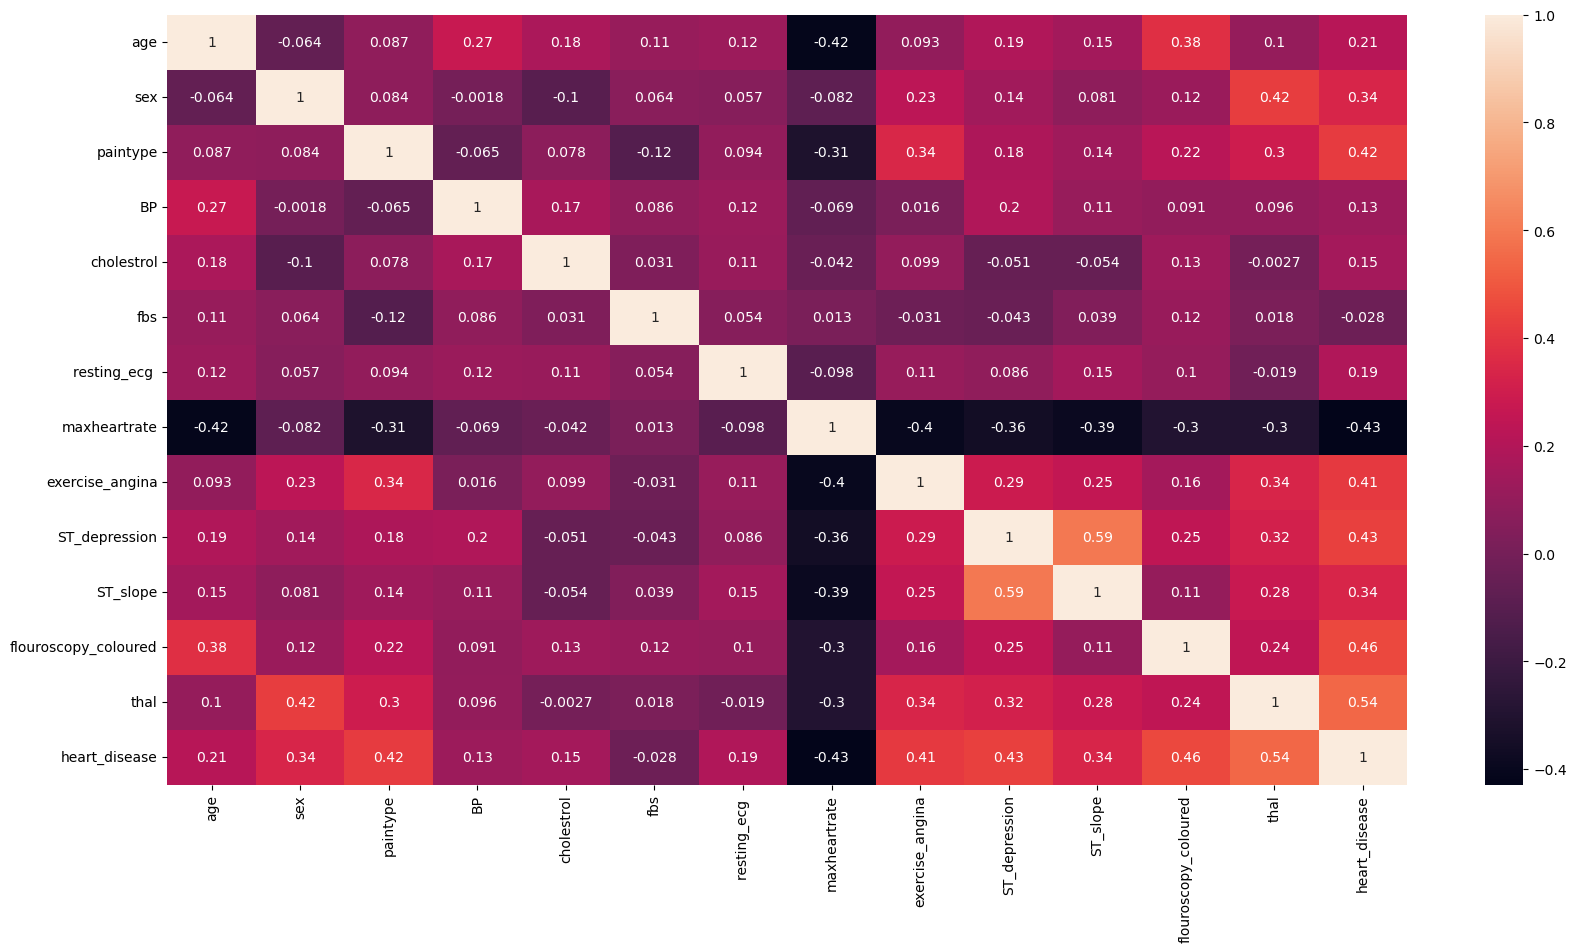

In [24]:
plt.figure(figsize = (20,10))
sns.heatmap(df_1.corr(), annot = True)

In [25]:
df_1.head()

,age,sex,paintype,BP,cholestrol,fbs,resting_ecg,maxheartrate,exercise_angina,ST_depression,ST_slope,flouroscopy_coloured,thal,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,1


In [26]:
X = df_1[['age', 'sex', 'paintype', 'BP', 'cholestrol', 'exercise_angina', 'ST_depression', 'flouroscopy_coloured', 'thal']]
Y = df_1['heart_disease']


In [27]:
X.shape

(255, 9)

In [28]:
Y.shape

(255,)

In [29]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [30]:
df_train , df_test = train_test_split(df_1, train_size = 0.7, test_size = 0.3, random_state = 100)

In [31]:
df_train.shape

(178, 14)

In [32]:
df_train.columns

Index(['age', 'sex', 'paintype', 'BP', 'cholestrol', 'fbs', 'resting_ecg ',
       'maxheartrate', 'exercise_angina', 'ST_depression', 'ST_slope',
       'flouroscopy_coloured', 'thal', 'heart_disease'],
      dtype='object')

In [33]:
df_test.shape

(77, 14)

# Dividing data into X_train and X_test , Y_train and Y_test

In [35]:
import statsmodels.api as sm
y_train = df_train.pop('heart_disease')
X_train = df_train

In [36]:
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)

X_train:  (178, 13)
y_train:  (178,)


In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 126 to 10
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   178 non-null    int64  
 1   sex                   178 non-null    int64  
 2   paintype              178 non-null    int64  
 3   BP                    178 non-null    int64  
 4   cholestrol            178 non-null    int64  
 5   fbs                   178 non-null    int64  
 6   resting_ecg           178 non-null    int64  
 7   maxheartrate          178 non-null    int64  
 8   exercise_angina       178 non-null    int64  
 9   ST_depression         178 non-null    float64
 10  ST_slope              178 non-null    int64  
 11  flouroscopy_coloured  178 non-null    int64  
 12  thal                  178 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 19.5 KB


# Using VIF

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
numeric_columns = ['age', 'sex', 'paintype', 'BP', 'cholestrol', 'exercise_angina', 'ST_depression', 'flouroscopy_coloured', 'thal']
X_train_numeric = X_train[numeric_columns]
vif = pd.DataFrame()
vif['Features'] = X_train_numeric.columns
vif['VIF'] = [variance_inflation_factor(X_train_numeric.values, i) for i in range(X_train_numeric.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,BP,53.60
0,age,40.08
4,cholestrol,30.89
2,paintype,13.37
8,thal,9.87
1,sex,4.21
6,ST_depression,2.36
5,exercise_angina,2.13
7,flouroscopy_coloured,1.96


In [41]:
X_train_lm = sm.add_constant(X_train_numeric)
print(X_train_lm.shape)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

(178, 10)


In [42]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:          heart_disease   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     20.75
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           3.03e-23
Time:                        15:51:04   Log-Likelihood:                -61.294
No. Observations:                 178   AIC:                             142.6
Df Residuals:                     168   BIC:                             174.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0659 

In [43]:
vif = pd.DataFrame()
vif['Features'] = X_train_numeric.columns
vif['VIF'] = [variance_inflation_factor(X_train_numeric.values, i) for i in range(X_train_numeric.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,BP,53.60
0,age,40.08
4,cholestrol,30.89
2,paintype,13.37
8,thal,9.87
1,sex,4.21
6,ST_depression,2.36
5,exercise_angina,2.13
7,flouroscopy_coloured,1.96


In [44]:
X_train_lm = sm.add_constant(X_train_numeric)
print(X_train_lm.shape)
lr_3 = sm.OLS(y_train, X_train_lm).fit()

(178, 10)


In [45]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:          heart_disease   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     20.75
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           3.03e-23
Time:                        15:51:04   Log-Likelihood:                -61.294
No. Observations:                 178   AIC:                             142.6
Df Residuals:                     168   BIC:                             174.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0659 

# Residual Analysis 

In [47]:
print(X_train_lm.shape)
y_train_price = lr_3.predict(X_train_lm)

(178, 10)


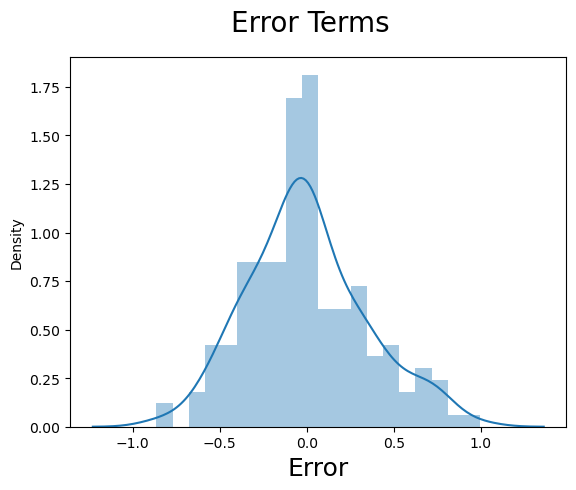

In [48]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms',fontsize = 20) 
plt.xlabel('Error', fontsize = 18)
plt.show()

In [49]:
x_train, x_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state= 100)

# Model building

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dt_default = DecisionTreeClassifier()

In [53]:
dt_default.fit(x_train, Y_train)

DecisionTreeClassifier()

# Importing Confusion Matrix from sklearn

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree


In [56]:
Y_pred_default = dt_default.predict(x_test)

In [57]:
plt.figure(figsize=(100,100))
tree.plot_tree(dt_default, feature_names=numeric_columns)

[Text(0.44642857142857145, 0.9375, 'paintype <= 3.5\ngini = 0.492\nsamples = 178\nvalue = [100, 78]'),
 Text(0.24285714285714285, 0.8125, 'thal <= 6.5\ngini = 0.27\nsamples = 87\nvalue = [73, 14]'),
 Text(0.14285714285714285, 0.6875, 'cholestrol <= 255.5\ngini = 0.159\nsamples = 69\nvalue = [63, 6]'),
 Text(0.08571428571428572, 0.5625, 'cholestrol <= 154.5\ngini = 0.041\nsamples = 48\nvalue = [47, 1]'),
 Text(0.05714285714285714, 0.4375, 'ST_depression <= 0.7\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.02857142857142857, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.08571428571428572, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.11428571428571428, 0.4375, 'gini = 0.0\nsamples = 46\nvalue = [46, 0]'),
 Text(0.2, 0.5625, 'age <= 55.0\ngini = 0.363\nsamples = 21\nvalue = [16, 5]'),
 Text(0.17142857142857143, 0.4375, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.22857142857142856, 0.4375, 'sex <= 0.5\ngini = 0.486\nsamples = 12\nvalue = [7, 5]'),


In [58]:
print(classification_report(Y_test, Y_pred_default))

              precision    recall  f1-score   support

           1       0.77      0.93      0.85        44
           2       0.88      0.64      0.74        33

    accuracy                           0.81        77
   macro avg       0.82      0.78      0.79        77
weighted avg       0.82      0.81      0.80        77



In [59]:
print(confusion_matrix(Y_test, Y_pred_default))

[[41  3]
 [12 21]]


In [60]:
dt hyper parameters:-

criterion (Gini/IG or entropy )
max_features
max_depth
min_samples_split
min_samples_leaf


SyntaxError: invalid syntax (1534955014.py, line 1)

In [61]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
n_folds=5
papameters= {}

In [63]:
 # GridSearchCV to find optimal max_depth 
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV 
# specify number of folds for k-fold CV 
n_folds = 5 
# parameters to build the model on 
parameters = {'max_depth': range(1, 40)} 
# instantiate the model 
dtree = DecisionTreeClassifier(criterion = "gini", random_state =100) 
# fit tree on training data 
tree = GridSearchCV(dtree, parameters, cv=n_folds,scoring="accuracy") 
tree.fit(X_train, y_train) 


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, scoring='accuracy')

In [64]:
 # GridSearchCV to find optimal max_depth 
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV 
# specify number of folds for k-fold CV 
n_folds = 5 
# parameters to build the model on 
parameters = {'min_samples_leaf': range(5, 200, 20)} 
# instantiate the model 
dtree = DecisionTreeClassifier(criterion = "gini", random_state =100) 
# fit tree on training data 
tree = GridSearchCV(dtree, parameters, cv=n_folds,scoring="accuracy") 
tree.fit(X_train, y_train) 


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             scoring='accuracy')

In [67]:
 # GridSearchCV to find optimal min_samples_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV 
# specify number of folds for k-fold CV 
n_folds = 5 
# parameters to build the model on 
parameters = {'min_samples_split': range(5, 200, 20)} 
# instantiate the model 
dtree = DecisionTreeClassifier(criterion = "gini", random_state =100) 
# fit tree on training data 
tree = GridSearchCV(dtree, parameters, cv=n_folds,scoring="accuracy") 
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             scoring='accuracy')

In [69]:
 # Create the parameter grid 
param_grid = { 
'max_depth': range(5, 15, 5), 
'min_samples_leaf': range(50, 150, 50), 
'min_samples_split': range(50, 150, 50), 
'criterion': ["entropy", "gini"] 
} 
n_folds = 5 

dtree = DecisionTreeClassifier() 
grid_search = GridSearchCV(estimator = dtree, param_grid =param_grid, 
cv = n_folds, verbose = 1) 
# Fit the grid search to the data 
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [71]:
!pip install pydot
!pip install graphviz
!pip install pydotplus

In [72]:
# If you're on windows:

# Specifing path for dot file.
import pydot
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus, graphviz 

import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'





# plotting tree with max_depth=3

dot_data = StringIO()  

export_graphviz(dt_default, out_file=dot_data,

        feature_names=numeric_columns, filled=True,rounded=True)



graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph.write_pdf("dt_heartdisease.pdf")

True

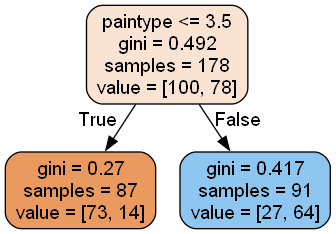

In [73]:
 # model with optimal hyperparameters 


#from sklearn.externals.six import StringIO
from six import StringIO

clf_gini = DecisionTreeClassifier(criterion = "gini", 
random_state = 100, 
max_depth=10, 
min_samples_leaf=50, 
min_samples_split=50) 
clf_gini.fit(x_train, Y_train) 
# accuracy score 
clf_gini.score(x_test,Y_test) 
# plotting the tree 
dot_data = StringIO() 
export_graphviz(clf_gini, 
out_file=dot_data,feature_names=numeric_columns,filled=True,rounded=True) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
Image(graph[0].create_png())


#install graphviz and py dot also to run this.

In [117]:
from IPython.display import Image
from skelarn.tree import export_graphviz
import pydotplus, graphviz 

from sklearn.externals.six import StringIO


ModuleNotFoundError: No module named 'skelarn'

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
rfc= RandomForestClassifier()

In [123]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [125]:
predictions = rfc.predict(x_test)

In [127]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [129]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           1       0.86      0.95      0.90        44
           2       0.93      0.79      0.85        33

    accuracy                           0.88        77
   macro avg       0.89      0.87      0.88        77
weighted avg       0.89      0.88      0.88        77



In [131]:
print(confusion_matrix(Y_test,predictions))

[[42  2]
 [ 7 26]]
